# Developing "Momentum" Trading Strategy
* Many differnt takes on this strategy
* Sometimes referred to as trend following
* Whatever you do and call it, you first need to research potential trading signals

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt


### 1. Download data: 
* Many services for this, some paid some free 
* Yahoo Finance API
* Typically trading "systems" involve a number of securities
* For this demonstration we are just going to look at GLD --> the gold ETF

In [7]:
gld = pdr.get_data_yahoo('GLD')
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,day,Open,High,Low,Close
Date,,,,,
2016-04-11,1,119.470001,120.300003,119.419998,120.029999
2016-04-12,2,120.230003,120.349998,119.550003,120.050003
2016-04-13,3,119.370003,119.430000,118.559998,118.769997
2016-04-14,4,118.089996,118.190002,116.949997,117.110001
2016-04-15,5,117.330002,118.120003,117.190002,117.919998


In [8]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-04-11 to 2021-04-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1258 non-null   int64  
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### 2. Add data/transform data
* calculate signal based on some price or statistical action
* we are going to try a moving average crossover to generate signals
* for this strategy we will always by "in" a trade, either long or short
* we are modeling; this means real life variation should be expected

#### Add moving averages to the data frame

In [27]:
gld['9-day'] = gld['Close'].rolling(9).mean()
gld['21-day'] = gld['Close'].rolling(21).mean()
gld[19:25]

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2016-06-07,41,118.500000,119.019997,118.410004,118.820000,117.052222,NaN,-1,-0.000841,0.000841,0.0
2016-06-08,42,120.300003,120.779999,120.230003,120.580002,117.452222,119.066192,-1,0.014704,-0.014704,0.0
2016-06-09,43,120.610001,121.480003,120.550003,121.250000,117.971111,119.079049,-1,0.005541,-0.005541,0.0
2016-06-10,44,121.550003,122.099998,121.180000,121.739998,118.651110,119.060953,-1,0.004033,-0.004033,0.0
2016-06-13,45,122.800003,122.830002,122.029999,122.639999,119.382222,119.131429,-1,0.007366,-0.007366,0.0
2016-06-14,46,123.000000,123.059998,122.300003,122.769997,120.141110,119.181905,1,0.001059,0.001059,2.0


#### Add "signal" column  

In [28]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2016-06-08,42,120.300003,120.779999,120.230003,120.580002,117.452222,119.066192,-1,0.014704,-0.014704,0.0
2016-06-09,43,120.610001,121.480003,120.550003,121.250000,117.971111,119.079049,-1,0.005541,-0.005541,0.0
2016-06-10,44,121.550003,122.099998,121.180000,121.739998,118.651110,119.060953,-1,0.004033,-0.004033,0.0
2016-06-13,45,122.800003,122.830002,122.029999,122.639999,119.382222,119.131429,1,0.007366,-0.007366,0.0
2016-06-14,46,123.000000,123.059998,122.300003,122.769997,120.141110,119.181905,1,0.001059,0.001059,2.0


#### Calculate Instantaneous returns/system returns

In [29]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2016-06-08,42,120.300003,120.779999,120.230003,120.580002,117.452222,119.066192,-1,NaN,NaN,NaN
2016-06-09,43,120.610001,121.480003,120.550003,121.250000,117.971111,119.079049,-1,0.005541,-0.005541,0.0
2016-06-10,44,121.550003,122.099998,121.180000,121.739998,118.651110,119.060953,-1,0.004033,-0.004033,0.0
2016-06-13,45,122.800003,122.830002,122.029999,122.639999,119.382222,119.131429,1,0.007366,0.007366,2.0
2016-06-14,46,123.000000,123.059998,122.300003,122.769997,120.141110,119.181905,1,0.001059,0.001059,0.0


#### Plot trades on time series

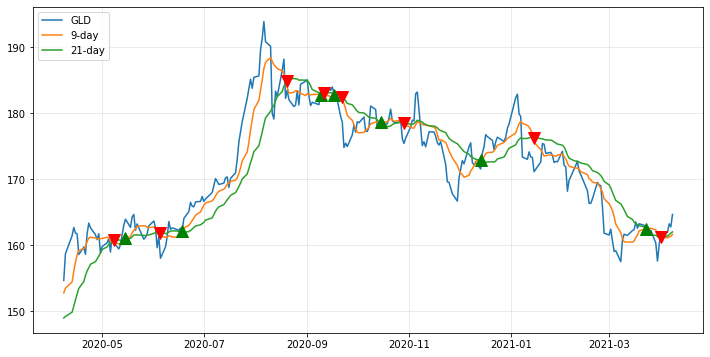

In [30]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

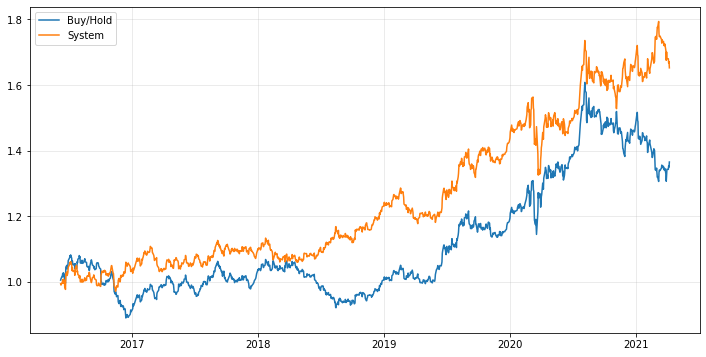

In [31]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [32]:
np.exp(gld['return']).cumprod()[-1] -1

0.3653996523304317

In [33]:
np.exp(gld['system_return']).cumprod()[-1] -1

0.6523109676509895